In [82]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import re
from preprocessing import preprocess_data

In [83]:
# Load the recipe and interaction data
recipes_df = pd.read_csv('RAW_recipes.csv')
interactions_df = pd.read_csv('RAW_interactions.csv')

# Filter interactions to only keep recipes with at least 3 interactions
recipe_counts = interactions_df['recipe_id'].value_counts()
valid_recipes = recipe_counts[recipe_counts >= 3].index
filtered_interactions_df = interactions_df[interactions_df['recipe_id'].isin(valid_recipes)]

# Further filter recipes to include only those in the interactions
filtered_recipes_df = recipes_df[recipes_df['id'].isin(filtered_interactions_df['recipe_id'])]

# Preprocess the filtered recipes
processed_recipes_df = preprocess_data(filtered_recipes_df, filtered_interactions_df)

# Save the preprocessed DataFrame and filtered interactions DataFrame to CSV files
processed_recipes_df.to_csv('preprocessed_recipes.csv', index=False)
filtered_interactions_df.to_csv('filtered_interactions.csv', index=False)

print("Preprocessed recipes saved to 'preprocessed_recipes.csv'.")
print("Filtered interactions saved to 'filtered_interactions.csv'.")

Filtering interactions based on recipe interactions...
Filtered interactions to 950174 rows.
Filtering recipes based on interactions...
Filtered recipes to 94564 rows based on interactions.
Processing nutritional data...
Adding nutritional tags...
Combining health tags...
Categorizing tags...
Dropping unnecessary columns...
Dropped columns: ['minutes', 'contributor_id', 'submitted', 'tags', 'nutrition', 'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients', 'calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)', 'High Protein', 'Very High Protein', 'Low Sugar', 'Low Fat', 'Low Calorie', 'High Calorie', 'High Fat', 'Moderate Sodium', 'Low Sodium', 'Weight Loss', 'Weight Gain', 'Muscle Building', 'Blood Pressure Management']
Preprocessing complete.
Preprocessed recipes saved to 'preprocessed_recipes.csv'.
Filtered interactions saved to 'filtered_interactions.csv'.


In [84]:
filtered_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9
11,better than sex strawberries,42198,1460,41531,2002-10-03,"['weeknight', 'time-to-make', 'course', 'main-...","[734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0]",8,['crush vanilla wafers into fine crumbs and li...,simple but sexy. this was in my local newspape...,"['vanilla wafers', 'butter', 'powdered sugar',...",7
12,better then bush s baked beans,67547,2970,85627,2003-07-26,"['weeknight', 'time-to-make', 'course', 'main-...","[462.4, 28.0, 214.0, 69.0, 14.0, 29.0, 23.0]",9,['in a very large sauce pan cover the beans an...,i'd have to say that this is a labor of love d...,"['great northern bean', 'chicken bouillon cube...",13


In [85]:
filtered_interactions_df.head()

,user_id,recipe_id,date,rating,review
5,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i b...
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo..."
7,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...
8,76535,134728,2005-09-02,4,Very good!
9,273745,134728,2005-12-22,5,Better than the real!!


In [86]:
# Merge
food_df = pd.merge(filtered_recipes_df, filtered_interactions_df, left_on='id', right_on='recipe_id')

# Display
print(food_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950174 entries, 0 to 950173
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            950174 non-null  object
 1   id              950174 non-null  int64 
 2   minutes         950174 non-null  int64 
 3   contributor_id  950174 non-null  int64 
 4   submitted       950174 non-null  object
 5   tags            950174 non-null  object
 6   nutrition       950174 non-null  object
 7   n_steps         950174 non-null  int64 
 8   steps           950174 non-null  object
 9   description     930587 non-null  object
 10  ingredients     950174 non-null  object
 11  n_ingredients   950174 non-null  int64 
 12  user_id         950174 non-null  int64 
 13  recipe_id       950174 non-null  int64 
 14  date            950174 non-null  object
 15  rating          950174 non-null  int64 
 16  review          950018 non-null  object
dtypes: int64(8), object(9)
memory

In [87]:
food_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,28603,31490,2002-08-19,0,"Have not tried this, but it sounds delicious. ..."
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,346277,31490,2006-08-27,5,This recipe was wonderful. Instead of using t...


In [88]:
food_df.shape

(950174, 17)

In [89]:
# Check for missing values
missing_values = food_df.isna().sum()
print(missing_values)

name                  0
id                    0
minutes               0
contributor_id        0
submitted             0
tags                  0
nutrition             0
n_steps               0
steps                 0
description       19587
ingredients           0
n_ingredients         0
user_id               0
recipe_id             0
date                  0
rating                0
review              156
dtype: int64


In [90]:
# Time features
food_df["submission_month"] = pd.to_datetime(food_df['submitted']).dt.month
food_df["submission_year"] = pd.to_datetime(food_df['submitted']).dt.year
food_df['review_month'] = pd.to_datetime(food_df['date']).dt.month
food_df['review_year'] = pd.to_datetime(food_df['date']).dt.year

# Drop date columns
food_df.drop(columns=['submitted', 'date'], inplace=True)
food_df[['name', 'submission_month', 'submission_year', 'review_month', 'review_year']].head(10)

,name,submission_month,submission_year,review_month,review_year
0,arriba baked winter squash mexican style,9,2005,2,2006
1,arriba baked winter squash mexican style,9,2005,8,2010
2,arriba baked winter squash mexican style,9,2005,12,2011
3,a bit different breakfast pizza,6,2002,8,2002
4,a bit different breakfast pizza,6,2002,8,2006
5,a bit different breakfast pizza,6,2002,7,2009
6,a bit different breakfast pizza,6,2002,4,2011
7,beat this banana bread,11,2003,5,2004
8,beat this banana bread,11,2003,4,2005
9,beat this banana bread,11,2003,7,2005


In [91]:
# Nutritional values
food_df['nutrition'] = food_df['nutrition'].str.replace(r'\[|\]', '', regex=True)
nutrition_cols = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'sat_fat', 'carbs']
food_df[nutrition_cols] = food_df['nutrition'].str.split(',', expand=True)
food_df[['name'] + nutrition_cols].drop_duplicates().head(10)

,name,calories,total_fat,sugar,sodium,protein,sat_fat,carbs
0,arriba baked winter squash mexican style,51.5,0.0,13.0,0.0,2.0,0.0,4.0
3,a bit different breakfast pizza,173.4,18.0,0.0,17.0,22.0,35.0,1.0
7,beat this banana bread,2669.3,160.0,976.0,107.0,62.0,310.0,138.0
12,better than sex strawberries,734.1,66.0,199.0,10.0,10.0,117.0,28.0
17,better then bush s baked beans,462.4,28.0,214.0,69.0,14.0,29.0,23.0
27,chicken lickin good pork chops,105.7,8.0,0.0,26.0,5.0,4.0,3.0
46,chile rellenos,94.0,10.0,0.0,11.0,11.0,21.0,0.0
68,chinese candy,232.7,21.0,77.0,4.0,6.0,38.0,8.0
80,chinese chop suey,395.4,31.0,20.0,29.0,51.0,33.0,8.0
84,cream of spinach soup,126.0,11.0,2.0,14.0,5.0,23.0,4.0


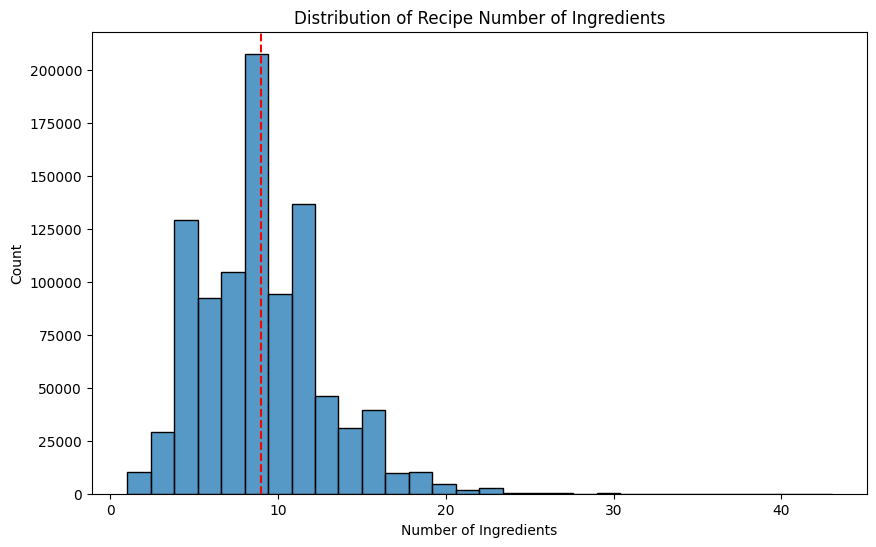

In [ ]:
# Recipe Number of Ingredients
plt.figure(figsize=(10, 6))
sns.histplot(food_df['n_ingredients'].dropna(), bins=30)
plt.xlabel("Number of Ingredients")
plt.title("Distribution of Recipe Number of Ingredients")
plt.axvline(food_df['n_ingredients'].median(), color='r', linestyle='--')
plt.show()

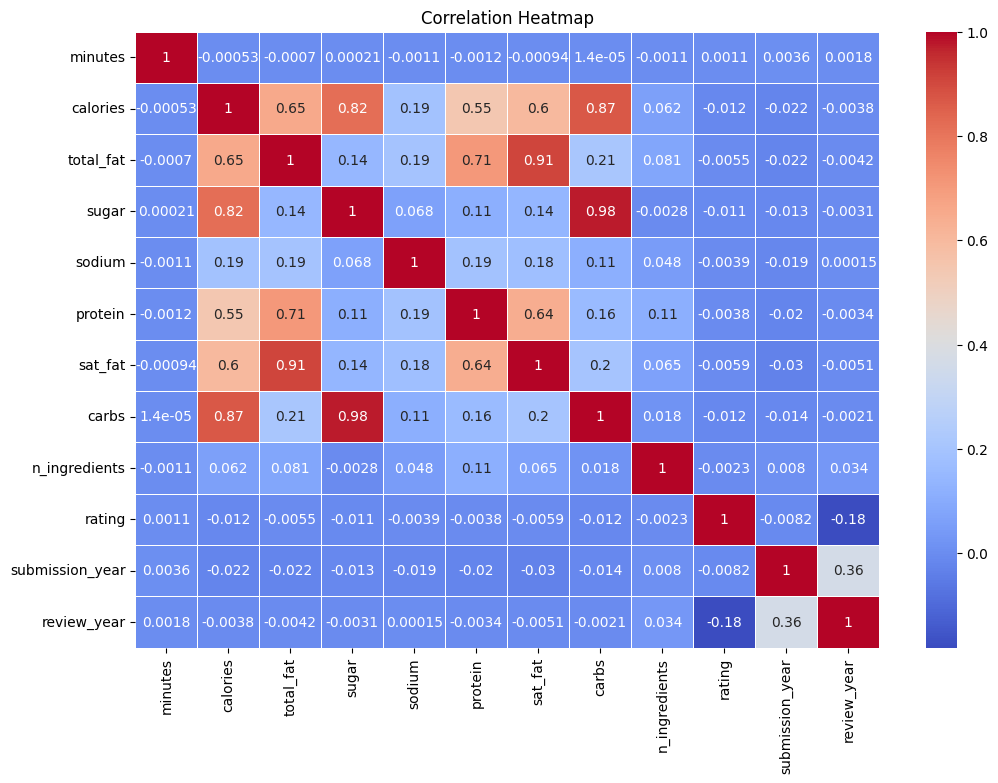

In [ ]:
# Correlation Heatmap
corr_values = food_df[['minutes'] + nutrition_cols + ['n_ingredients', 'rating', 'submission_year', 'review_year']].dropna()
corr_matrix = corr_values.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

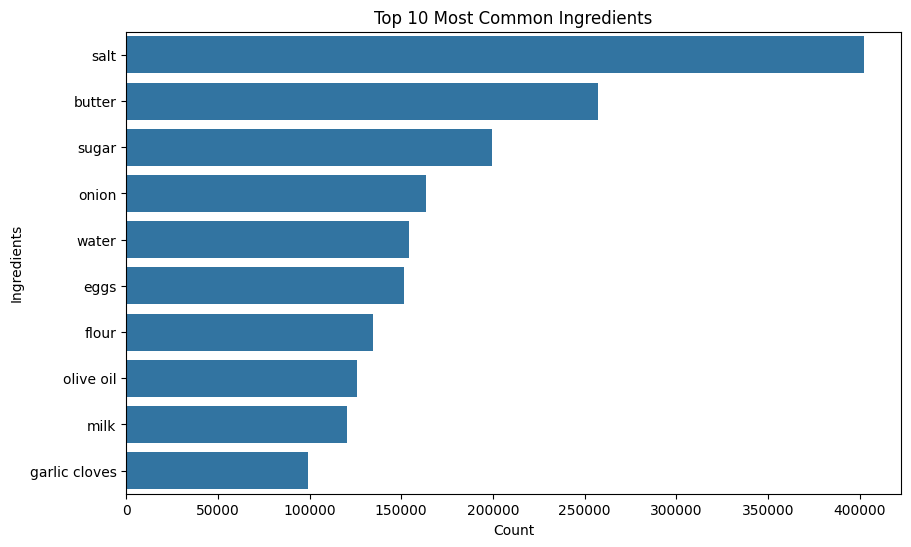

In [ ]:
# Extract ingredients
ingredients_list = food_df['ingredients'].str.replace(r'\[|\]', '', regex=True).str.split(', ').explode().str.strip()

# Remove quotes and special characters from ingredients
ingredients_list = ingredients_list.str.replace(r"['\"]", "", regex=True)

# Convert to lowercase
ingredients_list = ingredients_list.str.lower()
ingredients_counts = Counter(ingredients_list)

# Plot most common ingredients
common_ingredients = ingredients_counts.most_common(10)
ingredients, counts = zip(*common_ingredients)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(ingredients))
plt.xlabel("Count")
plt.ylabel("Ingredients")
plt.title("Top 10 Most Common Ingredients")
plt.show()


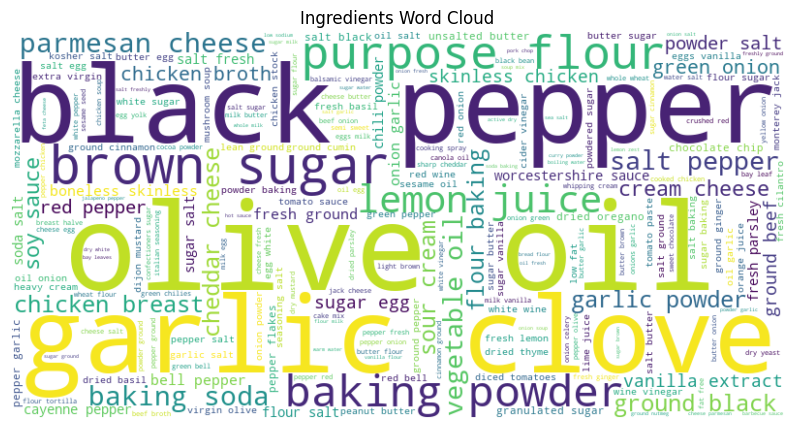

In [95]:
# Generate word cloud for ingredients
ingredients_text = ', '.join(ingredients_list.dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredients_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ingredients Word Cloud")
plt.show()

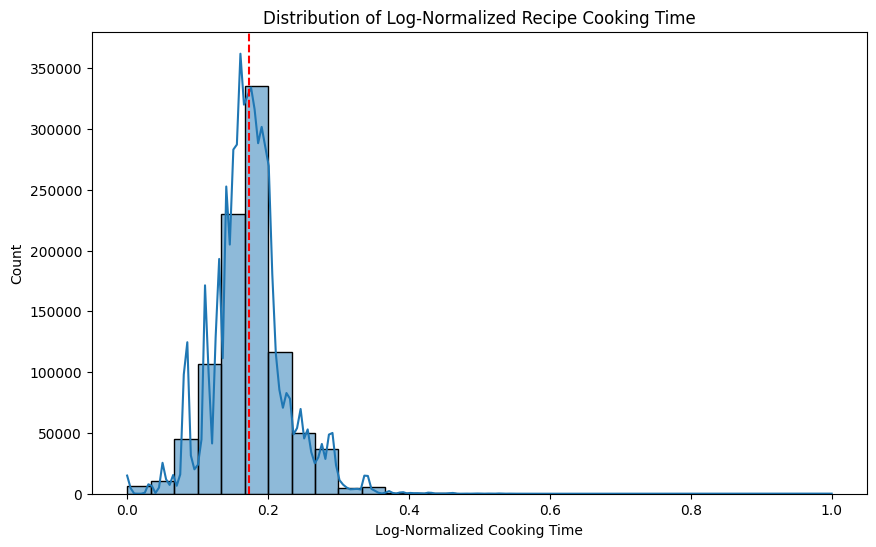

In [ ]:
# log transformation
food_df['minutes_log'] = np.log1p(food_df['minutes'])

# Normalize
scaler = MinMaxScaler()
food_df['minutes_normalized'] = scaler.fit_transform(food_df[['minutes_log']])

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(food_df['minutes_normalized'], kde=True, bins=30)
plt.xlabel("Log-Normalized Cooking Time")
plt.title("Distribution of Log-Normalized Recipe Cooking Time")
plt.axvline(food_df['minutes_normalized'].median(), color='r', linestyle='--')
plt.show()


In [97]:
x_min = food_df['minutes_log'].min()
x_max = food_df['minutes_log'].max()

# Reverse Min-Max normalization
median_log = 0.167 * (x_max - x_min) + x_min

# Reverse the log transformation
median_minutes = np.expm1(median_log)
print("Median cooking time in minutes:", median_minutes)

Median cooking time in minutes: 35.17697814798696


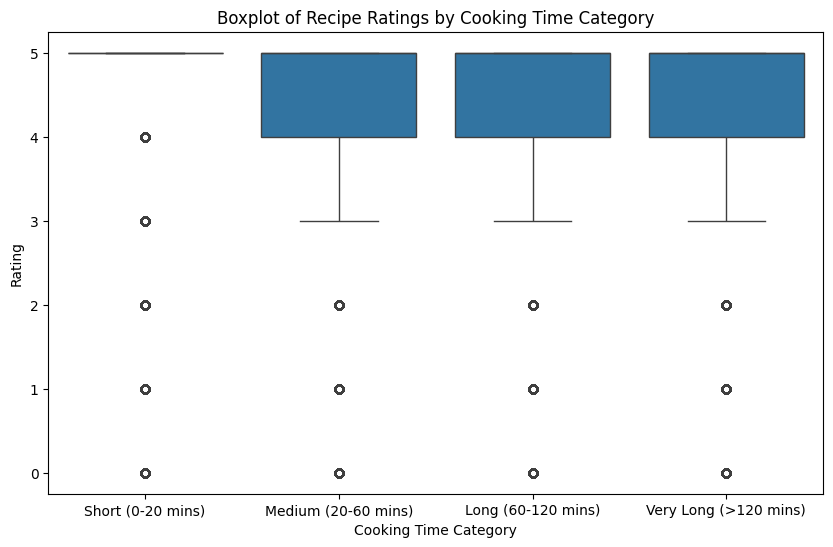

In [ ]:
# Ratings based on cooking time categories
bins = [0, 20, 60, 120, food_df['minutes'].max()]
labels = ['Short (0-20 mins)', 'Medium (20-60 mins)', 'Long (60-120 mins)', 'Very Long (>120 mins)']
food_df['cooking_time_category'] = pd.cut(food_df['minutes'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(x='cooking_time_category', y='rating', data=food_df)
plt.xlabel("Cooking Time Category")
plt.ylabel("Rating")
plt.title("Boxplot of Recipe Ratings by Cooking Time Category")
plt.show()

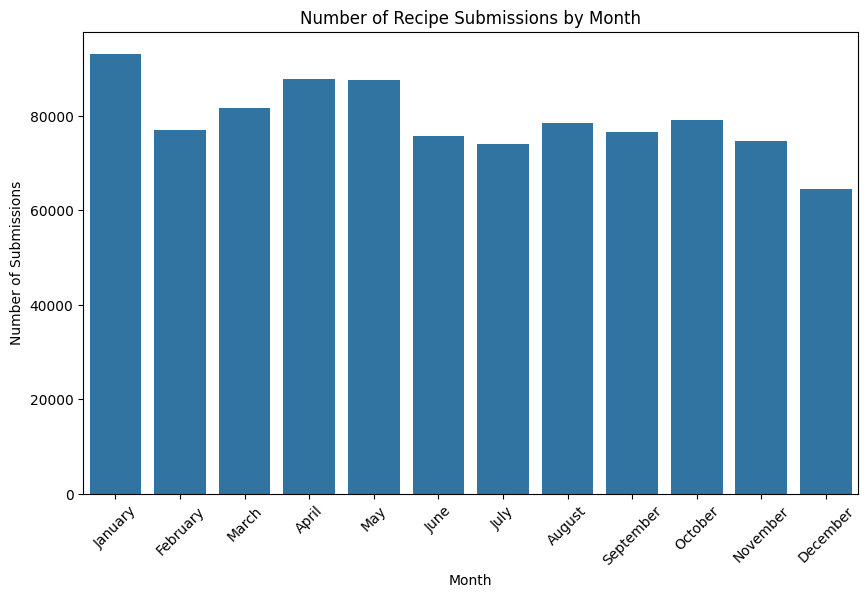

In [ ]:
# Map numeric months to month names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Apply mapping
food_df['submission_month'] = food_df['submission_month'].map(month_mapping)

# Plotting the number of recipe submissions by month
plt.figure(figsize=(10, 6))
sns.countplot(
    x='submission_month',
    data=food_df,
    order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
plt.xlabel("Month")
plt.ylabel("Number of Submissions")
plt.title("Number of Recipe Submissions by Month")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

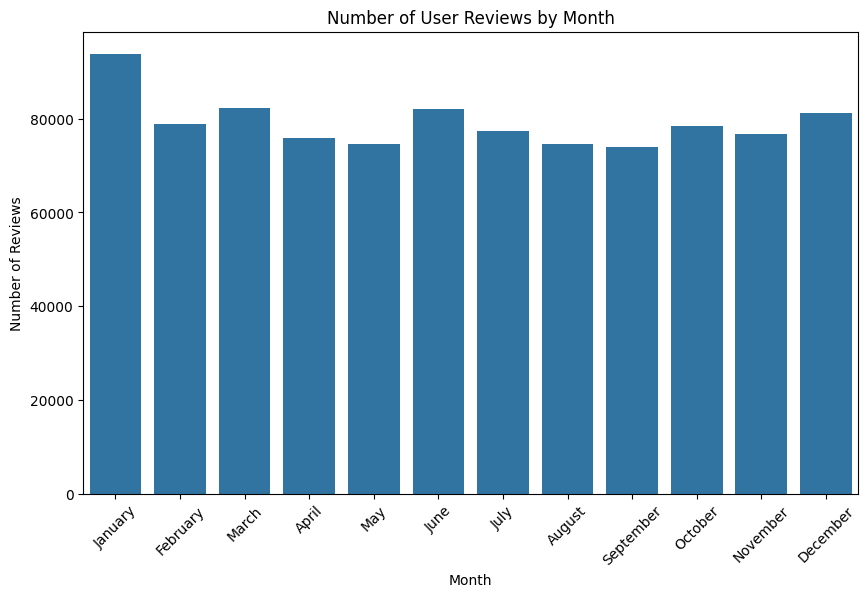

In [ ]:
# Apply mapping
food_df['review_month'] = food_df['review_month'].map(month_mapping)

plt.figure(figsize=(10, 6))
# Plotting the number of recipe submissions by month
plt.figure(figsize=(10, 6))
sns.countplot(
    x='review_month',
    data=food_df,
    order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.title("Number of User Reviews by Month")
plt.xticks(rotation=45)
plt.show()
